In [1]:
import librosa
from librosa import display
from librosa import feature

import numpy as np
from numpy import typing as npt

from matplotlib import pyplot as plt

In [4]:
y, sr = librosa.load("./Mozart_Turkish_March.wav", duration=25)

In [8]:
def plot_onset_strength(y: npt.ArrayLike, sr:int, standard: bool = True, custom_mel: bool = False, cqt: bool = False) :
    
    D = np.abs(librosa.stft(y))
    times = librosa.times_like(D)

    fig, ax = plt.subplots(nrows=2, sharex=True)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[0])
    
    ax[0].set(title='Power spectrogram')
    ax[0].label_outer()

    # Standard Onset Fuction 

    if standard :
        onset_env_standard = librosa.onset.onset_strength(y=y, sr=sr)
        ax[1].plot(times, 2 + onset_env_standard / onset_env_standard.max(), alpha=0.8, label='Mean (mel)')
    
    if custom_mel :
        onset_env_mel = librosa.onset.onset_strength(y=y, sr=sr,
                                                     aggregate=np.median,
                                                     fmax=8000, n_mels=256)
        ax[1].plot(times, 1 + onset_env_mel / onset_env_mel.max(), alpha=0.8, label='Median (custom mel)')
    
    if cqt :
        C = np.abs(librosa.cqt(y=y, sr=sr))
        onset_env_cqt = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
        ax[1].plot(times, onset_env_cqt / onset_env_cqt.max(), alpha=0.8, label='Mean (CQT)')

    ax[1].legend()
    ax[1].set(ylabel='Normalized strength', yticks=[])

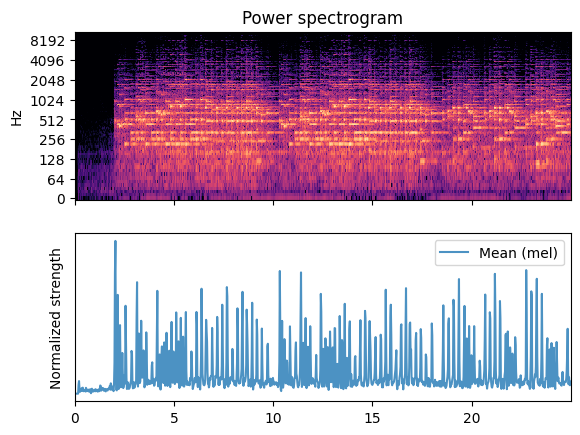

In [9]:
plot_onset_strength(y, sr)

In [60]:
def onset_with_spectrogrm(y: npt.ArrayLike, sr:int, show_tempo: bool = True, spec_type: str = 'mel', spec_hop_length: int = 512) :
    
    fig, ax = plt.subplots(nrows=2, sharex=True)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    times = librosa.times_like(onset_env, sr=sr, hop_length=spec_hop_length)

    if spec_type == 'mel':

        M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=spec_hop_length)
        librosa.display.specshow(librosa.power_to_db(M, ref=np.max), 
                                 y_axis='mel', x_axis='time', hop_length=spec_hop_length,
                                 ax=ax[0])
        ax[0].label_outer()
        ax[0].set(title='Mel spectrogram')
    
    if spec_type == 'stft':

        S = np.abs(librosa.stft(y))
        img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), 
                                       y_axis='log', x_axis='time', ax=ax[0])
        
        ax[0].label_outer()
        ax[0].set_title('Power spectrogram')
        fig.colorbar(img, ax=ax[0], format="%+2.0f dB")
    
    ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
    ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
    
    if show_tempo :
        tempoString = 'Tempo = %.2f'% (tempo)
        ax[1].plot([], [], ' ', label = tempoString)
    
    ax[1].legend()




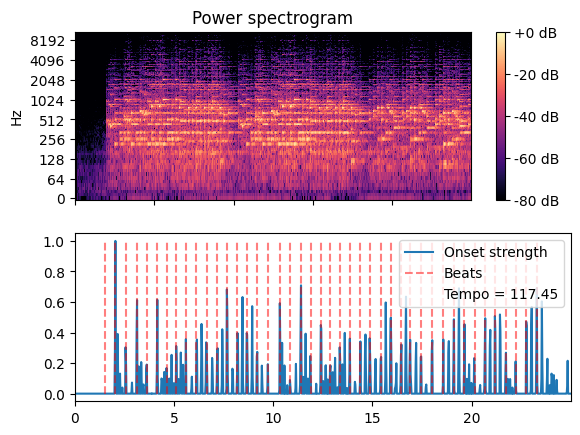

In [61]:
onset_with_spectrogrm(y, sr, spec_type='stft')